<a href="https://colab.research.google.com/github/worthlessFella/Python/blob/main/Socket_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The primary socket API functions and methods in this module are:

    socket()
    .bind()
    .listen()
    .accept()
    .connect()
    .connect_ex()
    .send()
    .recv()
    .close()



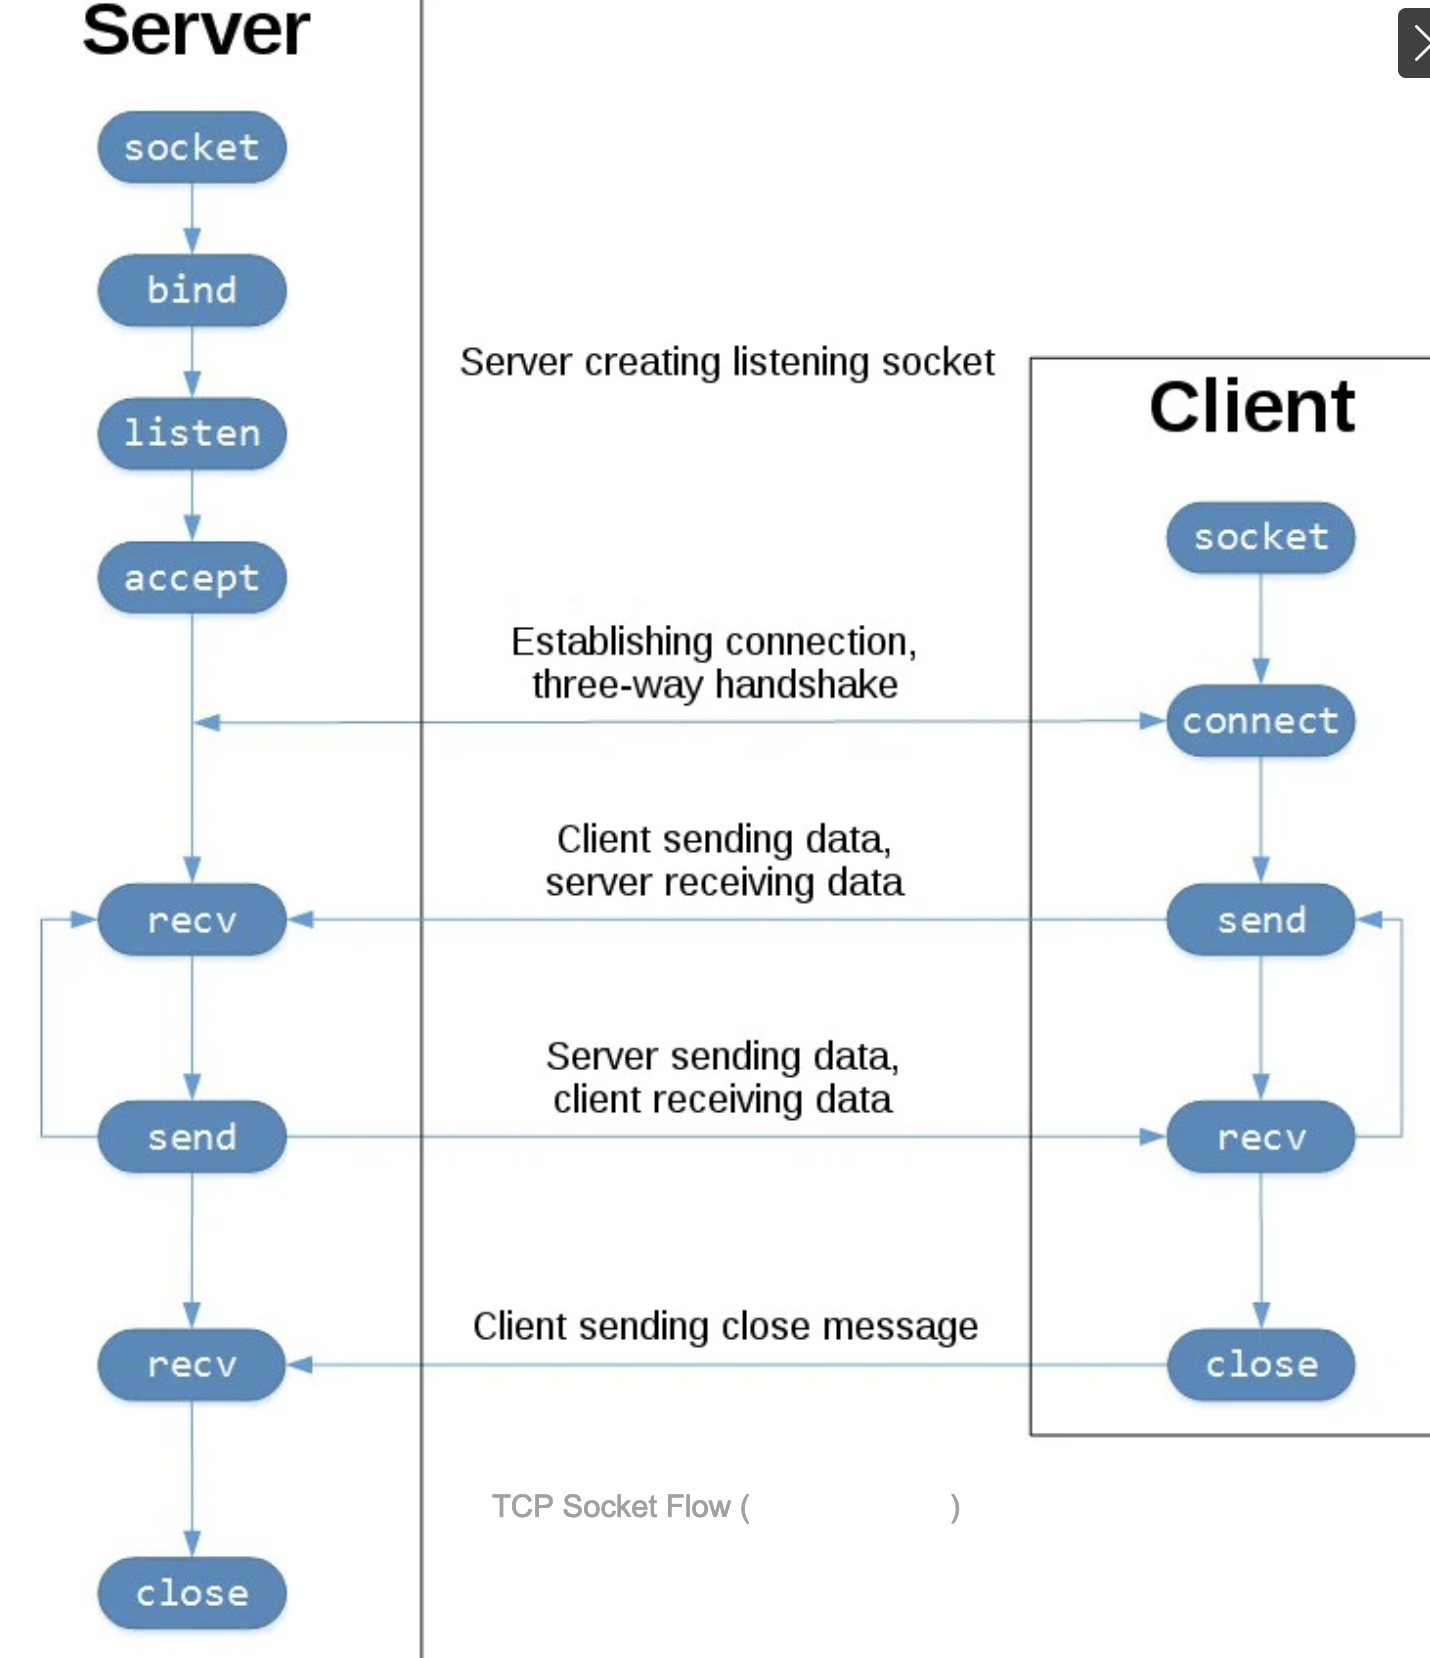

# Echo Server

In [1]:
import socket
import multiprocessing
import time

In [2]:
HOST = "127.0.0.1"  # Standard loopback interface address (localhost)
PORT = 65432  # Port to listen on (non-privileged ports are > 1023)

In [7]:
# echo-server.py

def server():
  with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    s.bind((HOST, PORT))
    s.listen()
    print('listening')
    conn, addr = s.accept()
    print('connecting')
    with conn:
        print(f"Connected by {addr}")
        while True:
            data = conn.recv(1024)
            if not data:
                break
            conn.sendall(data)


In [4]:
# echo-client.py

def client():
  with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
      s.connect((HOST, PORT))
      s.sendall(b"Hello, world")
      data = s.recv(1024)

  print(f"Received {data!r}")


In [8]:
server_thrd = multiprocessing.Process(target=server)
server_thrd.start()
time.sleep(5)
client()
server_thrd.join()

listening
connecting
Connected by ('127.0.0.1', 43620)
Received b'Hello, world'
